#   Marketing Campaigns

## Import Libraries:

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sc
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

## Import and read the file:

In [3]:
df = pd.read_csv('rolling_stones_spotify.csv')

## Data Cleaning and Preprocessing:

In [4]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [5]:
df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [7]:
df.shape

(1610, 18)

### Check the Columns: 

In [8]:
df.columns = df.columns.str.lstrip()

In [9]:
df.columns = df.columns.str.replace(' ', '') 

### Check and returns the number of missing values in the dataset:

In [10]:
df.isnull().sum()

Unnamed:0           0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

#### *Ensure that the date in a datetime format:*

In [17]:
df.drop(columns=['Unnamed:0','id','uri'])

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


#### *Make sure the columns are in the correct format:*

In [11]:
df['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

In [12]:
df['Income'] = df['Income'].str.replace('[$,]', '', regex=True)
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

#### Missing value imputation:

In [13]:
grouped_df = df.groupby(['Education', 'Marital_Status'])['Income'].mean().reset_index()

In [14]:
def impute_income(row):
    if pd.isna(row['Income']):
        similar_group = grouped_df[(grouped_df['Education'] == row['Education']) & (grouped_df['Marital_Status'] == row['Marital_Status'])]
        if not similar_group.empty:
            return similar_group['Income'].values[0]
    return row['Income']

In [15]:
df['Income'] = df.apply(impute_income, axis=1)
missing_values = df['Income'].isna().sum()
print(f"Number of missing values in 'Income' after imputation: {missing_values}")

Number of missing values in 'Income' after imputation: 0


### 	Create variables:

#### Children, Age and Total Spending:

In [16]:
df['Children'] = df['Kidhome']+df['Teenhome']
df['Age'] = 2024 - df['Year_Birth']
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,0,54,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,0,63,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,1,66,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,2,57,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,1,35,91


### Create BoxPlot:

#### Marital_Status:
##### describe the total spending for each marital status :

<Axes: xlabel='Marital_Status', ylabel='Total_Spending'>

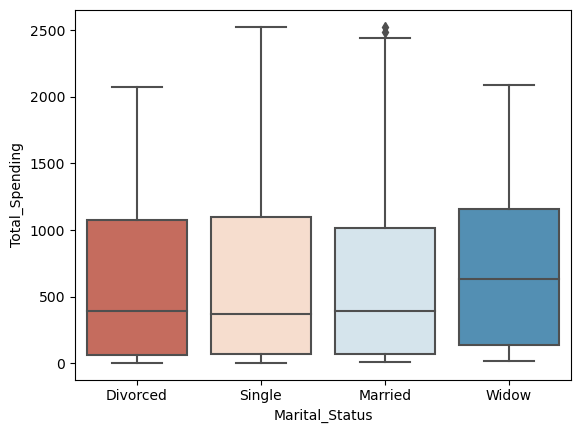

In [17]:
df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single', inplace=True)
df['Marital_Status'].replace(['Together'], 'Married', inplace=True)
sns.boxplot(x='Marital_Status', y='Total_Spending', data=df, palette='RdBu')

### Create Histogram:

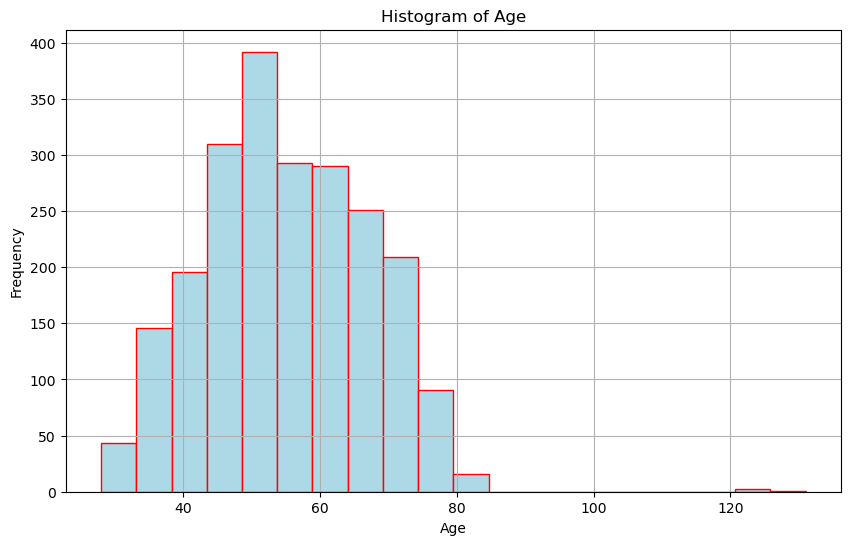

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='lightblue',edgecolor='red')  
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Ordinal encoding and one hot encoding:

In [19]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [20]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Widow'], dtype=object)

In [21]:
education_mapping = {'PhD': 4,'Master': 3,'Graduation': 2,'2n Cycle': 1,'Basic': 0}
df['Education'] = df['Education'].map(education_mapping)


print(education_mapping)

{'PhD': 4, 'Master': 3, 'Graduation': 2, '2n Cycle': 1, 'Basic': 0}


####  *by using sklearn.preprocessing to import OrdinalEncoder, OneHotEncoder:*

In [22]:
ohe = OneHotEncoder()

In [23]:
marital_encode = pd.DataFrame(ohe.fit_transform(df[['Marital_Status']]).toarray().astype(int), 
             columns = ohe.categories_[0])
marital_encode

,Divorced,Married,Single,Widow
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
2235,1,0,0,0
2236,0,1,0,0
2237,1,0,0,0
2238,0,1,0,0


In [24]:
country_encode = pd.DataFrame(ohe.fit_transform(df[['Country']]).toarray().astype(int), 
             columns = ohe.categories_[0])
country_encode

,AUS,CA,GER,IND,ME,SA,SP,US
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,1
2236,0,0,0,0,0,0,1,0
2237,0,0,0,0,0,0,1,0
2238,0,0,0,1,0,0,0,0


## HeatMap:

#### *here we choose only the numeric columns:*

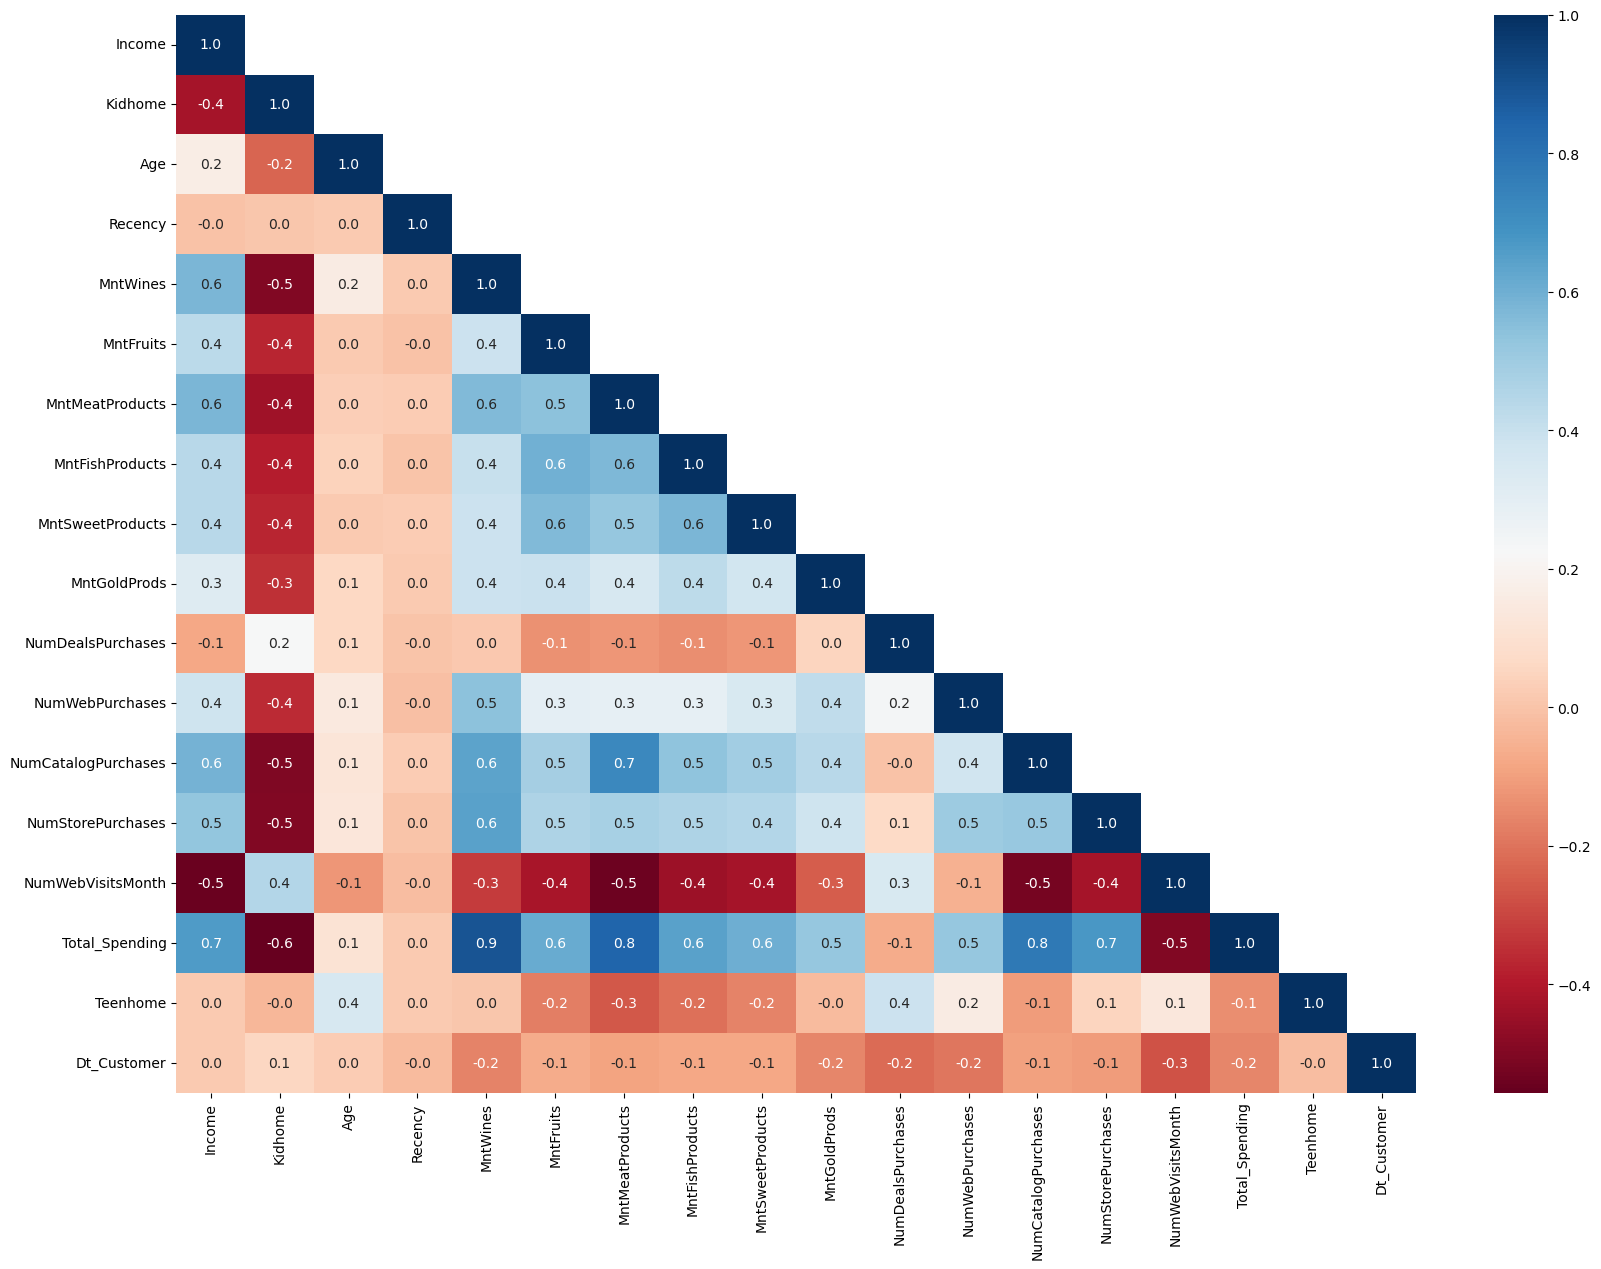

In [26]:
var_cor = ['Income', 'Kidhome', 'Age',  'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Total_Spending',
       'Teenhome', 'Dt_Customer']

cor_data = df[var_cor].corr()
plt.figure(figsize = (20,14))
m = np.ones_like(cor_data)
m[np.tril_indices_from(m)]=0
sns.heatmap(cor_data,annot = True,mask = m,fmt='.1f',cmap="RdBu")

plt.show()

## Test hypotheses:


##### *Older people are not as tech-savvy and probably prefer shopping in-store.* 

In [27]:
store = df.loc[df.Age >= 55, 'NumStorePurchases']
web = df.loc[df.Age >= 55, 'NumWebPurchases']


t_stat, p_value = stats.ttest_ind(store, web, alternative='greater')# alternative must be 'less', 'greater' or 'two-sided'


print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis: store purchases is greater than web purchases.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between 'store' and 'web'.")

t-statistic: 13.231798780611461
p-value: 8.796255198094317e-39
Reject the null hypothesis: store purchases is greater than web purchases.


#### 	*Customers with kids probably have less time to visit a store and would prefer to shop online.*

In [28]:
store = df.loc[df.Children >= 1, 'NumStorePurchases']
web = df.loc[df.Children >= 1, 'NumWebPurchases']


t_stat, p_value = stats.ttest_ind(web, store, alternative='greater')


print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis: store purchases is greater than web purchases.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between store and web'.")

t-statistic: -11.85534380488127
p-value: 1.0
Fail to reject the null hypothesis: There is no significant difference between store and web'.


In [29]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Children', 'Age',
       'Total_Spending'],
      dtype='object')

#### *Other distribution channels may cannibalize sales at the store.*

In [30]:
# select all rows
other_purchases = df.loc[:,['NumDealsPurchases', 'NumCatalogPurchases']].sum(axis = 1)

store = df.loc[:,'NumStorePurchases']

t_stat, p_value = stats.ttest_ind(other_purchases, store, alternative='greater')


print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis: store purchases is greater than othe purchases.")
else:
    print("Fail to reject the null hypothesis:store purchases is less than othe purchases .")

t-statistic: -7.96932881807209
p-value: 0.999999999999999
Fail to reject the null hypothesis:store purchases is less than othe purchases .


#### *Does the US fare significantly better than the rest of the world in terms of total purchases?*

In [31]:
# First add column to sum all the purchases:
df['Total_Purchases'] = df.loc[:, df.columns.str.endswith('Purchases')].sum(axis = 1)

In [32]:
df['Total_Purchases']

0       15
1       18
2       11
3        4
4        8
        ..
2235    20
2236     5
2237    14
2238    20
2239    18
Name: Total_Purchases, Length: 2240, dtype: int64

In [33]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Children', 'Age',
       'Total_Spending', 'Total_Purchases'],
      dtype='object')

In [34]:
us_purchases = df.loc[df.Country == "US",'Total_Purchases']
countries_purchases = df.loc[df.Country != "US",'Total_Purchases']

stats.ttest_ind(us_purchases, countries_purchases, alternative = 'greater')



print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis: country purchases.")
else:
    print("Fail to reject the null hypothesis: US greater number of purchases than the other Countries.")

t-statistic: -7.96932881807209
p-value: 0.999999999999999
Fail to reject the null hypothesis: US greater number of purchases than the other Countries.


## Visualization to analyze the DataFrame:

#### *Visualize the products are performing the best, and least in terms of revenue:*

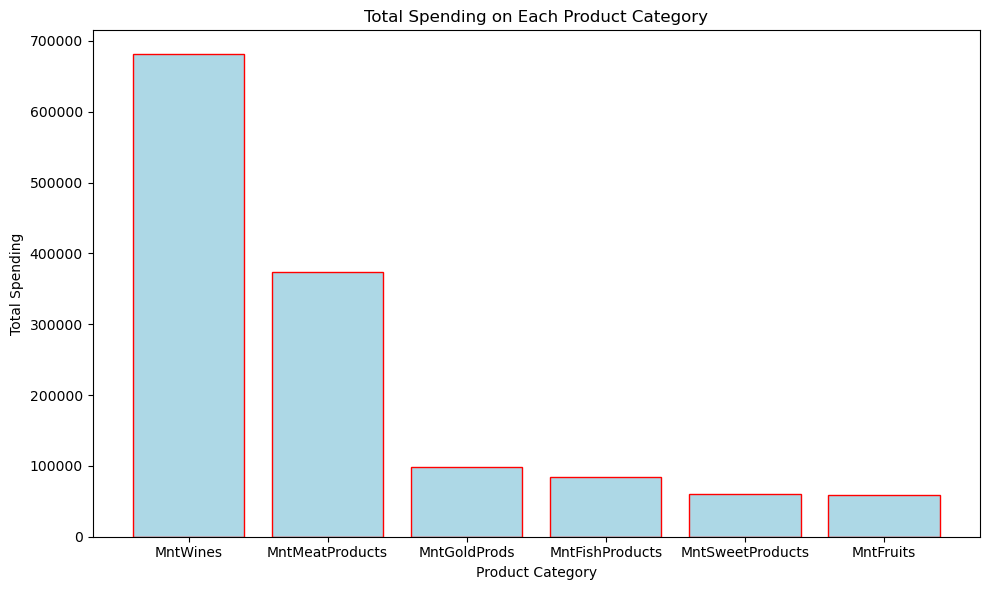

In [35]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


product_total_spending = df[product_columns].sum()


product_total_spending = product_total_spending.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(product_total_spending.index, product_total_spending.values, color='lightblue',edgecolor='red')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.title('Total Spending on Each Product Category')


# Show the plot
plt.tight_layout()
plt.show()






#### Visualise the pattern between the age of customers and the last campaign acceptance rate:

In [36]:
# First we need to check the correlation:
df[['Age','AcceptedCmp5']].corr()

,Age,AcceptedCmp5
Age,1.000000,-0.007123
AcceptedCmp5,-0.007123,1.000000


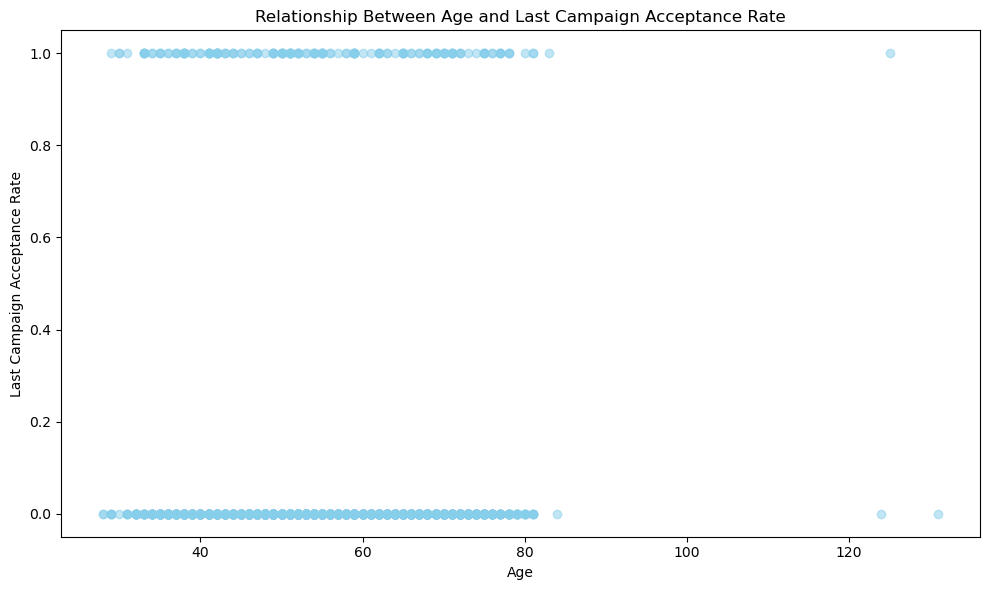

In [37]:
age = df['Age']
last_campaign_acceptance_rate = df['AcceptedCmp5']

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(age, last_campaign_acceptance_rate, color='skyblue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Last Campaign Acceptance Rate')
plt.title('Relationship Between Age and Last Campaign Acceptance Rate')

# Show the plot
plt.tight_layout()
plt.show()


####  *Visulaize which Country has the greatest number of customers who accepted the last campaign:*

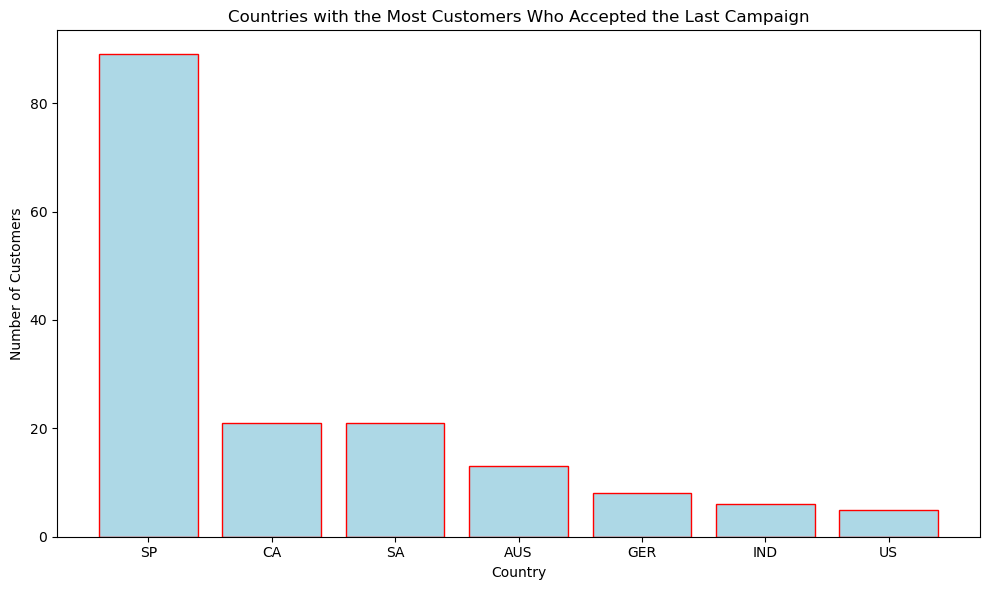

In [38]:
campaign_acceptance_by_country = df[df['AcceptedCmp5'] == 1].groupby('Country')['ID'].count().reset_index()

# Sort the countries by the number of customers who accepted the last campaign (from highest to lowest)
campaign_acceptance_by_country = campaign_acceptance_by_country.sort_values(by='ID', ascending=False)

# Create a bar chart to visualize the countries with the greatest number of customers who accepted the last campaign
plt.figure(figsize=(10, 6))
plt.bar(campaign_acceptance_by_country['Country'], campaign_acceptance_by_country['ID'], color='lightblue',edgecolor='red')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Countries with the Most Customers Who Accepted the Last Campaign')


# Show the plot
plt.tight_layout()
plt.show()


#### *Visualize the pattern between the number of children at home and total spend:*

In [39]:
# First we need to check the correlation:
df[['Children','Total_Spending']].corr()

,Children,Total_Spending
Children,1.000000,-0.498888
Total_Spending,-0.498888,1.000000


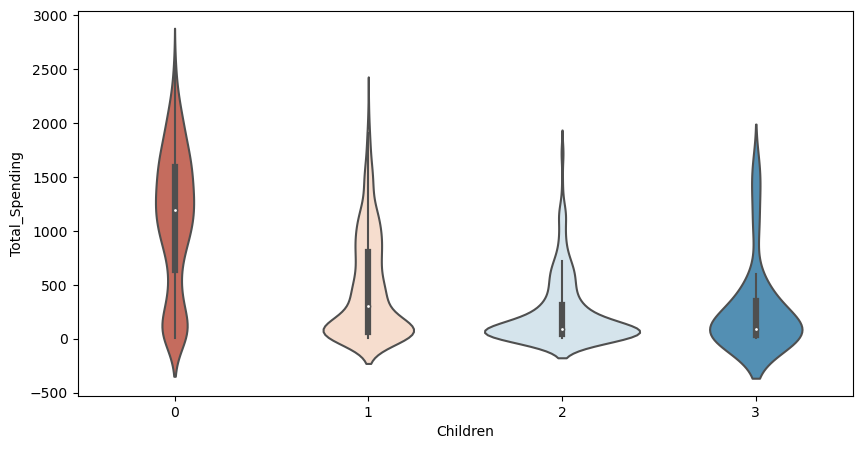

In [40]:
sns.violinplot(x=df['Children'], y=df['Total_Spending'], palette='RdBu')
plt.gcf().set_size_inches((10, 5)) 
plt.show()

#### *Visualizethe education background of the customers who complained in the last 2 years:*

#### *First we have to specify the date and columns*

In [41]:
temp = df[df.Dt_Customer.dt.year >= 2013]
temp.groupby(by=['Education', 'Dt_Customer'])[['Complain']].count()

Complain
Education Dt_Customer          
0         2013-01-07          1
          2013-01-08          1
          2013-01-12          1
          2013-01-16          2
          2013-01-27          1
...                         ...
4         2014-06-19          1
          2014-06-23          1
          2014-06-27          1
          2014-06-28          1
          2014-06-29          1

[1032 rows x 1 columns]

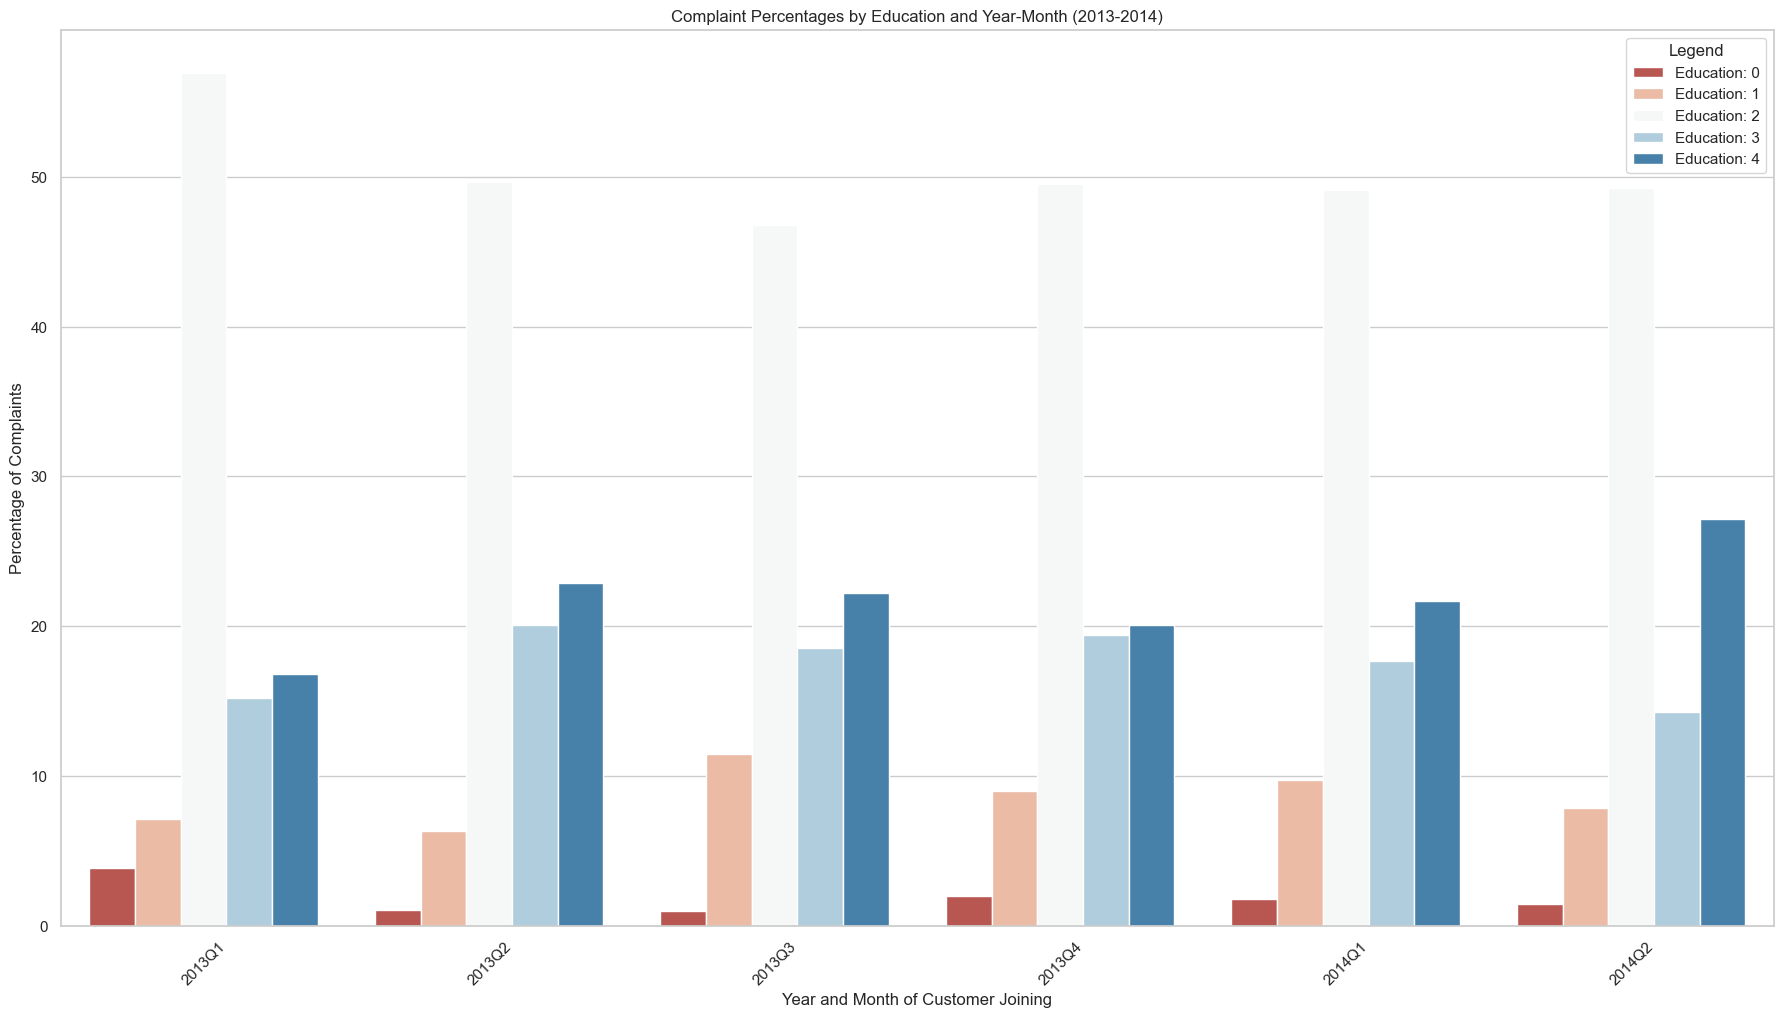

In [42]:
temp['Year_Month'] = temp['Dt_Customer'].dt.to_period('Q')

# Group the data by 'Education' and 'Year_Month', then count the number of complaints
complaint_counts = temp.groupby(by=['Education', 'Year_Month'])['Complain'].count().reset_index()

# Calculate the total number of complaints for each month
total_complaints_by_month = complaint_counts.groupby('Year_Month')['Complain'].sum()

# Calculate the percentage of complaints for each education level within each month
complaint_counts['Percentage'] = (complaint_counts['Complain'] / complaint_counts['Year_Month'].map(total_complaints_by_month) * 100)

# Create a bar chart to visualize the results
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")
ax = sns.barplot(data=complaint_counts, x='Year_Month', y='Percentage', hue='Education', palette='RdBu')
plt.xlabel('Year and Month of Customer Joining')
plt.ylabel('Percentage of Complaints')
plt.title('Complaint Percentages by Education and Year-Month (2013-2014)')

# Customize the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=[f'Education: {label}' for label in labels], title='Legend', title_fontsize='12')

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()